In [29]:
# We start by loading the libraries we're going to use
import folium
import pandas as pd

In [30]:
# Here we store the paths to the data files
# Remember to change this in case your folder structure is different
geo_json_path = "../data/raw/shapefiles/be.geojson"
weather_df = pd.read_csv("../data/raw/weather/weather.csv", sep = "\t")

# First task: the number of observation and of variables is the shape of the dataframe
print(weather_df.shape)

(17940, 9)


In [32]:
# Second task: check for missing values. We start by asking if there's any NA
print(weather_df.isna().any().any()) # There aren't any! We're so lucky, this never happens normally :-)

# Now we check if there's a variable that needs special treatment
# In this case, temperature is reported in kelvins, but we'd like it in celsius instead
# Careful if you run this cell more than once!
weather_df["TemperatureAboveGround"] = weather_df["TemperatureAboveGround"] - 273.15

# Third task, filter the dataframe to contain only the data bout the country of interest
# We do so by checking the iso3166-2 code of the country: it needs to start with the iso3166 code!
weather_df = weather_df[weather_df["iso3166-2"].str.startswith("BE")]

# Fourth task: summary statistics by region
# Standard pandas groupby here...
weather_by_region = weather_df.groupby(by = "iso3166-2").agg(["min", "mean", "median", "max"])
weather_by_region

False


RelativeHumiditySurface                                   \
                              min       mean     median        max   
iso3166-2                                                            
BE-BRU                  36.252698  68.133589  69.374325  95.870706   
BE-VAN                  38.419056  71.080787  73.775432  95.123050   
BE-VBR                  37.635130  70.008914  71.705779  95.366391   
BE-VLI                  37.645726  70.758964  72.966082  95.726265   
BE-VOV                  40.857715  72.585117  74.478645  96.898064   
BE-VWV                  43.061019  74.253856  75.930469  96.603008   
BE-WBR                  37.703755  70.636355  72.251670  96.411530   
BE-WHT                  39.752968  71.930584  74.029674  97.783085   
BE-WLG                  32.807430  70.876632  72.724446  92.964400   
BE-WLX                  33.849564  72.853060  75.236125  95.251015   
BE-WNA                  33.893140  71.776714  73.064613  95.639022   

          SolarRadiation                                            \
                     min          mean        median           max   
iso3166-2                                                            
BE-BRU        707.367566  9.211600e+06  8.779634e+06  2.360226e+07   
BE-VAN       3572.687097  9.003486e+06  8.545787e+06  2.340342e+07   
BE-VBR       2433.934477  9.167639e+06  8.749505e+06  2.356338e+07   
BE-VLI       1671.532009  9.006679e+06  8.406145e+06  2.338781e+07   
BE-VOV       2531.566272  9.370733e+06  8.787523e+06  2.359747e+07   
BE-VWV        780.685705  9.691296e+06  8.833957e+06  2.387936e+07   
BE-WBR       1369.622168  9.167203e+06  8.811465e+06  2.369639e+07   
BE-WHT       9912.356423  9.241733e+06  8.561980e+06  2.383880e+07   
BE-WLG       1665.410607  8.944146e+06  7.940632e+06  2.376571e+07   
BE-WLX       2677.759814  9.098241e+06  7.612962e+06  2.361223e+07   
BE-WNA       7362.123138  9.099337e+06  8.254778e+06  2.382860e+07   

          Surfacepressure                ... Totalprecipitation            \
                      min          mean  ...             median       max   
iso3166-2                                ...                                
BE-BRU       2.357691e+06  2.422877e+06  ...           0.000436  0.014785   
BE-VAN       2.367321e+06  2.432203e+06  ...           0.000492  0.019543   
BE-VBR       2.357515e+06  2.422465e+06  ...           0.000500  0.017270   
BE-VLI       2.353707e+06  2.417549e+06  ...           0.000561  0.016485   
BE-VOV       2.366270e+06  2.432189e+06  ...           0.000443  0.020884   
BE-VWV       2.366757e+06  2.433615e+06  ...           0.000570  0.022454   
BE-WBR       2.343549e+06  2.408237e+06  ...           0.000463  0.016200   
BE-WHT       2.342352e+06  2.407745e+06  ...           0.000530  0.015183   
BE-WLG       2.292895e+06  2.355083e+06  ...           0.000755  0.020923   
BE-WLX       2.275341e+06  2.337143e+06  ...           0.000767  0.021462   
BE-WNA       2.310762e+06  2.374413e+06  ...           0.000619  0.016888   

            UVIndex                                  WindSpeed            \
                min       mean     median        max       min      mean   
iso3166-2                                                                  
BE-BRU     1.264706  24.367327  25.000000  48.000000  0.809314  3.510405   
BE-VAN     1.452020  23.583397  23.968435  47.989899  0.582039  3.237255   
BE-VBR     2.700880  24.680065  24.810851  48.000000  0.787353  3.553474   
BE-VLI     2.979769  23.490094  23.972544  47.950867  0.790185  3.455517   
BE-VOV     1.194896  24.344270  24.473318  48.000000  0.851547  3.834434   
BE-VWV     1.613333  24.291248  24.056666  48.000000  1.192306  4.503949   
BE-WBR     3.116279  24.968824  24.988372  48.000000  0.907195  3.869948   
BE-WHT     1.633333  24.436804  24.557895  48.000000  0.919671  3.783201   
BE-WLG     2.657944  23.592605  23.995327  48.371963  1.023769  3.761004   
BE-WLX     1.503322  23.477996  23.897841  48.995017  1.2

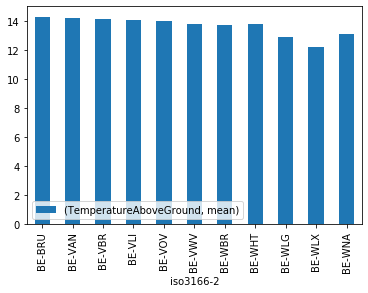

In [23]:
# To plot, we use pandas built-in support for matplotlib
# Any data series can be plotted by calling ".plot.<plottype>()"
# <plottype> is the type of plot you want to show. I this case, let's go for bars.
# Since we have a multi index on the columns, we need to slice it, pandas style
idx = pd.IndexSlice
weather_by_region.loc[:, idx["TemperatureAboveGround", :, :]].plot.bar(y = ("TemperatureAboveGround", "mean")).legend(loc = "lower left")


In [24]:
# Let's now aggregate by date, in this case we only want the mean (no multi index any more, phew!)
weather_by_day = weather_df.groupby(by = "date").mean()
weather_by_day

,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
date,,,,,,,
2020-02-13,85.064598,1.527664e+06,2.373433e+06,5.845322,0.008464,3.925263,6.195265
2020-02-14,79.348811,2.405332e+06,2.412422e+06,7.189153,0.000361,3.560415,4.272880
2020-02-15,77.191328,1.089223e+06,2.403208e+06,9.514281,0.000691,4.943192,7.151545
2020-02-16,76.468793,6.303972e+05,2.376698e+06,12.104412,0.010930,3.714297,11.118859
2020-02-17,76.402325,3.732992e+06,2.399506e+06,7.611647,0.002614,5.563091,7.303339
...,...,...,...,...,...,...,...
2020-11-10,94.635060,1.912492e+06,2.426158e+06,11.081588,0.000797,3.943721,1.640783
2020-11-11,91.838248,5.492403e+05,2.419898e+06,10.756741,0.000078,2.779148,2.844908
2020-11-12,83.281632,2.911536e+06,2.407978e+06,10.072595,0.000974,4.044800,4.500427


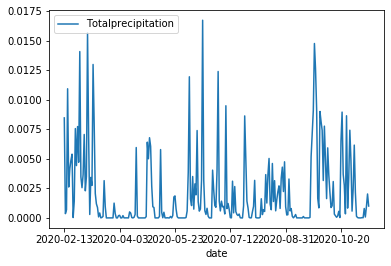

In [25]:
# Same as above, plot via pandas' bindings
weather_by_day.loc[:, "Totalprecipitation"].plot.line().legend(loc = "upper left")

In [26]:
# Time to look at some maps
# First, let's initialize folium by finding the geographic center of the country and an appropriate zoom level
m = folium.Map(location = [50.5, 4.7], zoom_start = 8)

m

In [27]:
# We now load the geoJSON which contains the bonduaries for the country's regions
folium.GeoJson(geo_json_path, name = "geojson").add_to(m)

folium.LayerControl().add_to(m)

m